In [35]:
import pandas as pd
from datetime import datetime as dt

In [36]:
d_parser = lambda x: dt.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('../Data/ETH_1h.csv', parse_dates = ['Date'], date_parser=d_parser)

In [37]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [26]:
df.shape

(23674, 7)

In [38]:
df.loc[0]['Date'].dayname

AttributeError: 'Timestamp' object has no attribute 'dayname'

In [13]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d %I-%p')

In [39]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [40]:
df.loc[0,'Date'].day_name()

'Friday'

In [44]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [45]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [46]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [48]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [49]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [50]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [57]:
filt = (df['Date'] > '2019') & (df['Date'] < '2020')

In [58]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10503,2019-01-01 05:00:00,ETHUSD,131.96,132.58,131.96,132.48,317851.90,Tuesday
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [62]:
df.set_index('Date', inplace = True)

In [63]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [64]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [69]:
df['2020-01-01':'2020-10-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [70]:
df['2020-01-01':'2020-10-02']['Close']

Date
2020-03-13 20:00:00    128.71
2020-03-13 19:00:00    129.94
2020-03-13 18:00:00    119.51
2020-03-13 17:00:00    124.47
2020-03-13 16:00:00    124.08
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1749, dtype: float64

In [71]:
df['2020-01-01':'2020-10-02']['Close'].mean() # Will return on hourly basis !

197.56875929102344

In [74]:
df.loc['2020-01-01']['High'].max()

132.68

In [79]:
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [80]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

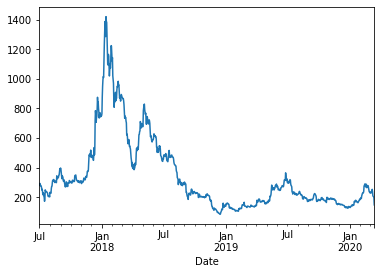

In [81]:
highs.plot()

In [84]:
df.resample('M').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-31,220.118963,222.516126,217.489018,220.010969,2.480603e+06
2017-08-31,298.258616,300.082661,296.421465,298.511815,2.056356e+06
2017-09-30,298.656472,301.120875,295.837278,298.524639,2.331871e+06
2017-10-31,305.642594,306.866976,304.328159,305.649772,1.096153e+06
2017-11-30,355.471236,357.946500,353.141028,355.646292,2.741744e+06
2017-12-31,629.484960,636.534435,621.435081,629.898011,6.952835e+06
2018-01-31,1083.552487,1096.335121,1068.435242,1084.040390,1.038829e+07
2018-02-28,872.477783,880.735893,862.989390,872.098304,6.135724e+06
2018-03-31,630.316505,634.618750,625.060524,629.704341,2.726483e+06


In [87]:
df.resample('M').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-31,220.010969,293.73,130.26,1.818282e+09
2017-08-31,298.511815,392.00,200.82,1.529929e+09
2017-09-30,298.524639,396.88,202.25,1.678947e+09
2017-10-31,305.649772,350.00,275.46,8.155377e+08
2017-11-30,355.646292,518.13,278.88,1.974056e+09
2017-12-31,629.898011,875.00,415.01,5.172910e+09
2018-01-31,1084.040390,1419.96,727.14,7.728885e+09
2018-02-28,872.098304,1143.00,555.56,4.123206e+09
2018-03-31,629.704341,878.00,365.00,2.028503e+09
